<a href="https://colab.research.google.com/github/CodeArmour/API/blob/main/stock_price_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [43]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the file name
file_path = "NSE-TATAGLOBAL11.csv"

# Load the dataset directly as a pandas DataFrame
data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "akshaydattatraykhare/nsetataglobal",
    file_path
)

# Display the first 5 records
print("First 5 records:")
print(data.head(10))

# Show column names
print("\nColumns:", data.columns.tolist())

/tmp/ipython-input-2023104736.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  data = kagglehub.load_dataset(


Using Colab cache for faster access to the 'nsetataglobal' dataset.
First 5 records:
         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   
5  2018-09-28  234.05  235.95  230.20  233.50  233.75             3069914.0   
6  2018-09-27  234.55  236.80  231.10  233.80  233.25             5082859.0   
7  2018-09-26  240.00  240.00  232.50  235.00  234.25             2240909.0   
8  2018-09-25  233.30  236.75  232.00  236.25  236.10             2349368.0   
9  2018-09-24  233.55  239.20  230.75  234.00  233.30             3423509.0   

   Turnover (Lacs)  
0         10062.83  
1  

Text(0, 0.5, 'Close Price')

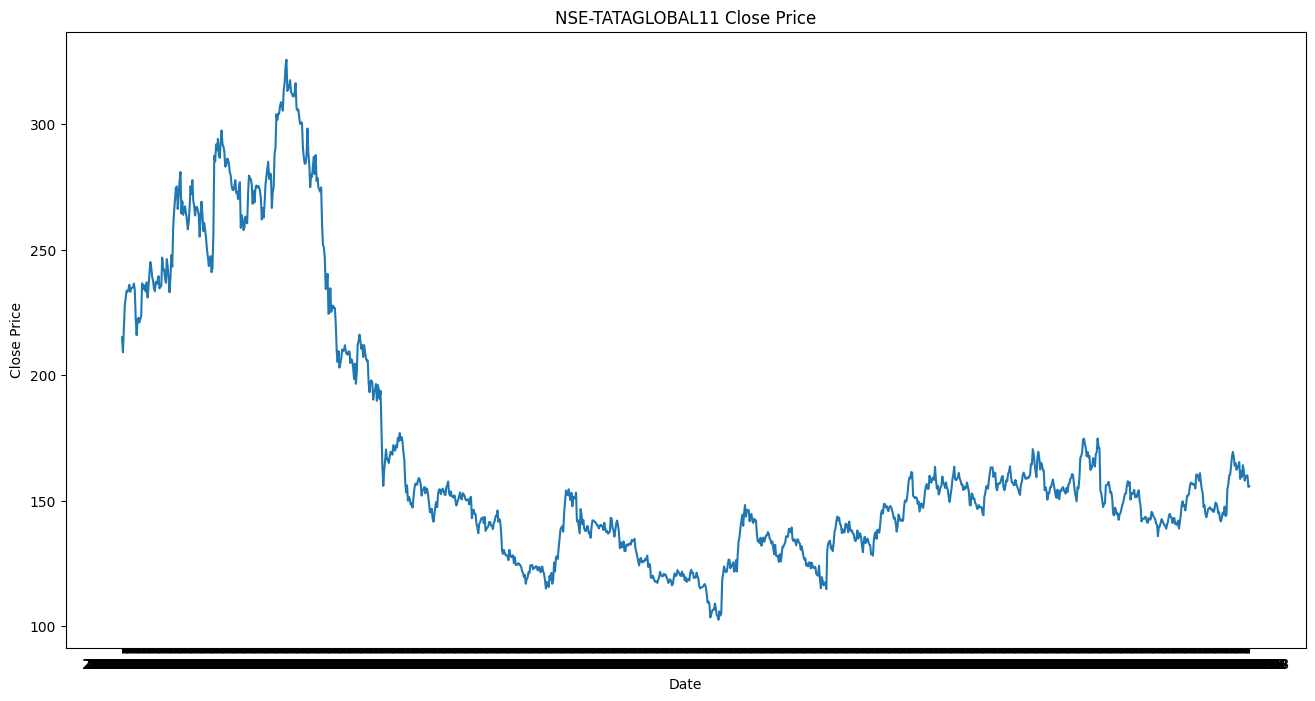

In [44]:
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('NSE-TATAGLOBAL11 Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

*Classifecation Problem : Sell(-1) or Buy(1) the stock*

In [45]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

Input ***features*** to predicet customer should buy or sell the stock

In [46]:
X = data[['Open - Close', 'High - Low']]
X.head(10)

,Open - Close,High - Low
0,-7.15,15.40
1,7.80,12.70
2,5.30,11.65
3,2.40,11.75
4,3.65,13.55
5,0.30,5.75
6,1.30,5.70
7,5.75,7.50
8,-2.80,4.75
9,0.25,8.45


In [47]:
y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit

## using grid search to find best parameter
params = {'n_neighbors': np.arange(1, 25)}
tscv = TimeSeriesSplit(n_splits=5)
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=tscv)

## fit the model
model.fit(X_train, y_train)

## accuracy score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('train data accuracy:', accuracy_train)
print('test data accuracy:', accuracy_test)

print('Best score: {}'.format(model.best_score_))
print('Best parameters: {}'.format(model.best_params_))



train data accuracy: 0.8906882591093117
test data accuracy: 0.8461538461538461
Best score: 0.8609756097560977
Best parameters: {'n_neighbors': np.int64(9)}


In [59]:
prediction_classification = model.predict(X_test)

In [60]:
actual_predicted_data = pd.DataFrame({'predicted': prediction_classification, 'actual': y_test})

In [61]:
actual_predicted_data.head(10)

,predicted,actual
0,-1,-1
1,-1,-1
2,-1,-1
3,1,1
4,1,1
5,-1,-1
6,1,1
7,-1,-1
8,1,1
9,1,-1


Regression Problem : KNN

In [53]:
Y = data['Close']

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, Y, test_size=0.2, random_state=44)

## using grid search to find best parameter
params = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsRegressor()
model_reg = GridSearchCV(knn, params, cv=5)

## fit the model
model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [55]:
print(predictions)

[214.55416667 191.60208333 243.01875    156.69583333 134.41666667
 236.37291667 194.33125    188.40208333 131.75416667 139.50208333
 194.84791667 135.77291667 149.86875    141.87083333 236.29375
 145.775      158.26041667 143.10208333 170.98958333 144.94583333
 170.06458333 169.93125    199.41041667 153.3875     148.07291667
 140.16875    157.57708333 138.83333333 224.01875    232.175
 143.84166667 152.9125     155.18958333 153.16875    143.82083333
 227.72083333 166.82708333 141.08541667 132.51875    141.47708333
 146.33333333 140.38333333 152.87708333 190.90208333 139.60208333
 153.48958333 137.51666667 135.30208333 186.18541667 227.96041667
 147.32708333 218.55833333 138.25625    191.19166667 140.33958333
 151.78125    138.65       151.27291667 181.6        216.5125
 152.45208333 143.91666667 138.53958333 139.04375    173.71458333
 215.97083333 161.02083333 190.63333333 146.43958333 143.12083333
 165.33541667 144.9375     161.33125    161.92291667 154.81041667
 151.65625    194.2520

In [56]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_reg, predictions))
print(rmse)

37.20903962816275


In [57]:
valid = pd.DataFrame({'actual': y_test_reg, 'predicted': predictions})
valid.head(10)

,actual,predicted
1000,161.60,214.554167
715,132.50,191.602083
283,193.85,243.018750
410,143.90,156.695833
1188,145.15,134.416667
141,278.20,236.372917
230,226.35,194.331250
794,139.50,188.402083
481,139.40,131.754167
707,137.55,139.502083
